In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import os
def list_images(root_dir):
    image_paths = []
    for root, dirs, files in os.walk(root_dir):
        for file in files:
            if file.endswith(('.jpg', '.jpeg', '.png', '.gif')):
                image_paths.append(os.path.join(root, file))
    return image_paths
# Replace 'path_to_your_dataset_folder' with the actual path to your dataset folder
dataset_folder = '/kaggle/input/biofare/biofors_images 2'
image_paths = list_images(dataset_folder)
# If you want to convert the list of image paths into a DataFrame
import pandas as pd
df_main = pd.DataFrame({'Images_path': image_paths})
print(df_main.shape)
print(df_main['Images_path'].iloc[0])
print(df_main['Images_path'].iloc[1])

(47805, 1)
/kaggle/input/biofare/biofors_images 2/437/010300.png
/kaggle/input/biofare/biofors_images 2/437/010400.png


In [2]:
image_names = df_main['Images_path'].apply(os.path.basename)
parent_folder_names = df_main['Images_path'].apply(lambda x: os.path.basename(os.path.dirname(x)))
image_names = image_names.str.replace('.png','')
parent_folder_names = parent_folder_names.str.replace('.png','')

In [4]:
print(image_names)
print(parent_folder_names)

0        010300
1        010400
2        060500
3        010200
4        060300
          ...  
47800    040200
47801    060000
47802    030101
47803    020000
47804    010100
Name: Images_path, Length: 47805, dtype: object
0        437
1        437
2        437
3        437
4        437
        ... 
47800    715
47801    715
47802    715
47803    715
47804    715
Name: Images_path, Length: 47805, dtype: object


In [5]:
j = 0
for i in parent_folder_names :
    parent_folder_names[j]  = i + '.' + image_names[j]
    j=j+1

In [6]:
print(parent_folder_names)

0        437.010300
1        437.010400
2        437.060500
3        437.010200
4        437.060300
            ...    
47800    715.040200
47801    715.060000
47802    715.030101
47803    715.020000
47804    715.010100
Name: Images_path, Length: 47805, dtype: object


In [7]:
df_main['Image_id'] = parent_folder_names
df_main

,Images_path,Image_id
0,/kaggle/input/biofare/biofors_images 2/437/010...,437.010300
1,/kaggle/input/biofare/biofors_images 2/437/010...,437.010400
2,/kaggle/input/biofare/biofors_images 2/437/060...,437.060500
3,/kaggle/input/biofare/biofors_images 2/437/010...,437.010200
4,/kaggle/input/biofare/biofors_images 2/437/060...,437.060300
...,...,...
47800,/kaggle/input/biofare/biofors_images 2/715/040...,715.040200
47801,/kaggle/input/biofare/biofors_images 2/715/060...,715.060000
47802,/kaggle/input/biofare/biofors_images 2/715/030...,715.030101
47803,/kaggle/input/biofare/biofors_images 2/715/020...,715.020000


In [8]:
import pandas as pd
import json

# Read the JSON file into a Python object
with open('/kaggle/input/json-file/classification.json') as f:
    data = json.load(f)

# Convert the JSON data to a Pandas DataFrame
df = pd.json_normalize(data)

# Now df contains your JSON data in a Pandas DataFrame format
df = pd.DataFrame(df)

# Rotate the DataFrame
rotated_df = df.melt(var_name='Image_id', value_name='Class')

rotated_df

,Image_id,Class
0,1.060000.png,Blot/Gel
1,1.060001.png,Blot/Gel
2,1.060002.png,Blot/Gel
3,1.060003.png,Blot/Gel
4,1.060100.png,Blot/Gel
...,...,...
47800,1031.030203.png,Microscopy
47801,1031.020000.png,Microscopy
47802,1031.020001.png,Microscopy
47803,1031.020002.png,Microscopy


In [9]:
rotated_df['Image_id'] = rotated_df['Image_id'].str.replace('.png','')
rotated_df

,Image_id,Class
0,1.060000,Blot/Gel
1,1.060001,Blot/Gel
2,1.060002,Blot/Gel
3,1.060003,Blot/Gel
4,1.060100,Blot/Gel
...,...,...
47800,1031.030203,Microscopy
47801,1031.020000,Microscopy
47802,1031.020001,Microscopy
47803,1031.020002,Microscopy


In [10]:
df_main
df_final = pd.merge(df_main,rotated_df,on='Image_id',how = 'inner')
df_final

,Images_path,Image_id,Class
0,/kaggle/input/biofare/biofors_images 2/437/010...,437.010300,Blot/Gel
1,/kaggle/input/biofare/biofors_images 2/437/010...,437.010400,Blot/Gel
2,/kaggle/input/biofare/biofors_images 2/437/060...,437.060500,Blot/Gel
3,/kaggle/input/biofare/biofors_images 2/437/010...,437.010200,Blot/Gel
4,/kaggle/input/biofare/biofors_images 2/437/060...,437.060300,Blot/Gel
...,...,...,...
47800,/kaggle/input/biofare/biofors_images 2/715/040...,715.040200,Blot/Gel
47801,/kaggle/input/biofare/biofors_images 2/715/060...,715.060000,Blot/Gel
47802,/kaggle/input/biofare/biofors_images 2/715/030...,715.030101,Blot/Gel
47803,/kaggle/input/biofare/biofors_images 2/715/020...,715.020000,Blot/Gel


In [11]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
image_path = df_main['Images_path'].iloc[0]

[]

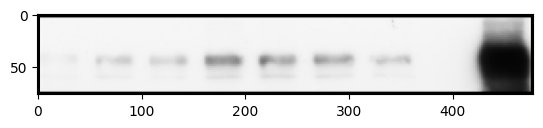

In [12]:
img = imread(image_path)
plt.imshow(img)
plt.plot()

In [13]:
frequency = df_final['Class'].value_counts()

# Display the result
print(frequency)

Class
Blot/Gel      27440
Microscopy    18110
Macroscopy     1194
FACS           1061
Name: count, dtype: int64


In [14]:
df_final

,Images_path,Image_id,Class
0,/kaggle/input/biofare/biofors_images 2/437/010...,437.010300,Blot/Gel
1,/kaggle/input/biofare/biofors_images 2/437/010...,437.010400,Blot/Gel
2,/kaggle/input/biofare/biofors_images 2/437/060...,437.060500,Blot/Gel
3,/kaggle/input/biofare/biofors_images 2/437/010...,437.010200,Blot/Gel
4,/kaggle/input/biofare/biofors_images 2/437/060...,437.060300,Blot/Gel
...,...,...,...
47800,/kaggle/input/biofare/biofors_images 2/715/040...,715.040200,Blot/Gel
47801,/kaggle/input/biofare/biofors_images 2/715/060...,715.060000,Blot/Gel
47802,/kaggle/input/biofare/biofors_images 2/715/030...,715.030101,Blot/Gel
47803,/kaggle/input/biofare/biofors_images 2/715/020...,715.020000,Blot/Gel


In [15]:
import numpy as np
import cv2 as cv
kernel_size = 5
threshold_value = 127
lower_bound = 0
upper_bound = 255
ksize = (5,5)
dilate_kernel = np.ones((5,5), np.uint8)
image_data = []
img_gray_matrix = []
for i,x in enumerate(df_final['Images_path']):
    img = cv.imread(x)
    resized_img = cv.resize(img,(224,224))
    #img_gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
    #img_color =cv.cvtColor
    #img_eq = cv.equalizeHist(img_gray)
    #img_median_filtered = cv.medianBlur(img_gray, kernel_size)
    img_gaussian_filtered = cv.GaussianBlur(resized_img, ksize,0)
    #img_normalized = cv.normalize(img_median_filtered, None, alpha=lower_bound, beta=upper_bound, norm_type=cv.NORM_MINMAX)
    img_normalized_gb = cv.normalize(img_gaussian_filtered, None, alpha=lower_bound, beta=upper_bound, norm_type=cv.NORM_MINMAX)
    img_eroded = cv.erode(img_normalized_gb, dilate_kernel, iterations=1)
    img_dilated = cv.dilate(img_eroded, dilate_kernel, iterations=1)
    image_data.append(img_dilated)
      # Adjust this value as needed
    #_, img_binary = cv.threshold(img_normalized_gb, threshold_value, 255, cv.THRESH_BINARY)

    #cv.imwrite(x, img_median_filtered)

In [16]:
print(type(img_dilated))

<class 'numpy.ndarray'>


In [19]:
print(img_dilated.shape)

(224, 224, 3)


In [17]:
df_final['image_data'] = image_data

In [18]:
print(df_final)

                                             Images_path    Image_id  \
0      /kaggle/input/biofare/biofors_images 2/437/010...  437.010300   
1      /kaggle/input/biofare/biofors_images 2/437/010...  437.010400   
2      /kaggle/input/biofare/biofors_images 2/437/060...  437.060500   
3      /kaggle/input/biofare/biofors_images 2/437/010...  437.010200   
4      /kaggle/input/biofare/biofors_images 2/437/060...  437.060300   
...                                                  ...         ...   
47800  /kaggle/input/biofare/biofors_images 2/715/040...  715.040200   
47801  /kaggle/input/biofare/biofors_images 2/715/060...  715.060000   
47802  /kaggle/input/biofare/biofors_images 2/715/030...  715.030101   
47803  /kaggle/input/biofare/biofors_images 2/715/020...  715.020000   
47804  /kaggle/input/biofare/biofors_images 2/715/010...  715.010100   

          Class                                         image_data  
0      Blot/Gel  [[[2, 2, 2], [2, 2, 2], [2, 2, 2], [0, 0, 0], ...

[]

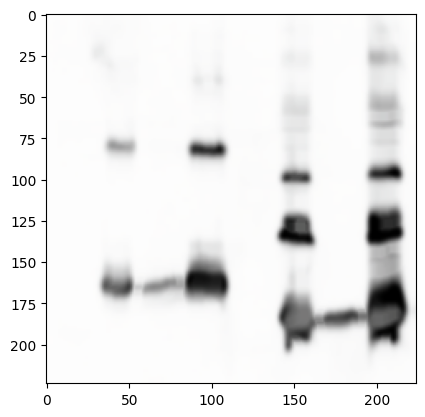

In [21]:
image_d = df_final['image_data'].iloc[-1]
plt.imshow(image_d)
plt.plot()

(264, 424, 3)


[]

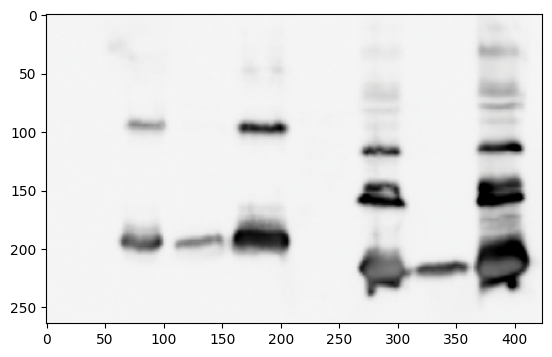

In [22]:
path = df_final['Images_path'].iloc[-1]
read = imread(path)
plt.imshow(read)
print(read.shape)
plt.plot()

(264, 424, 3)


[]

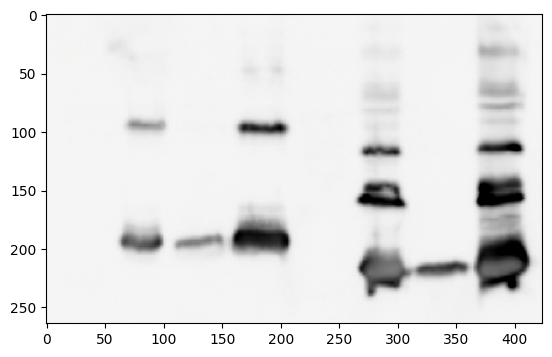

In [23]:
plt.imshow(img)
print(img.shape)
plt.plot()

[]

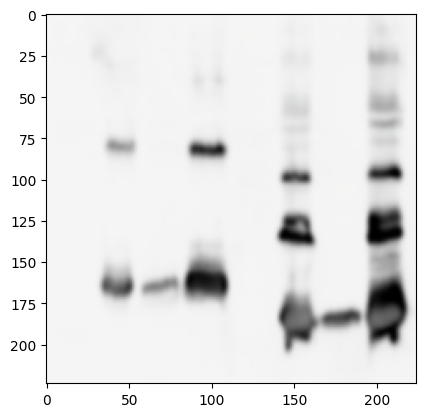

In [24]:
plt.imshow(img_gaussian_filtered,cmap='gray')
plt.plot()

[]

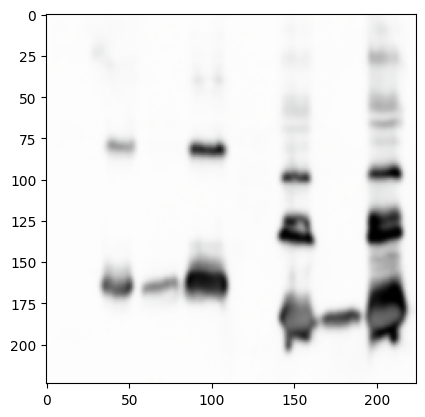

In [25]:
plt.imshow(img_normalized_gb,cmap='gray')
plt.plot()

[]

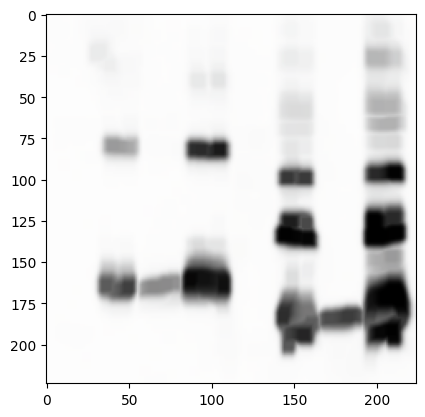

In [26]:
plt.imshow(img_eroded,cmap='gray')
plt.plot()

[]

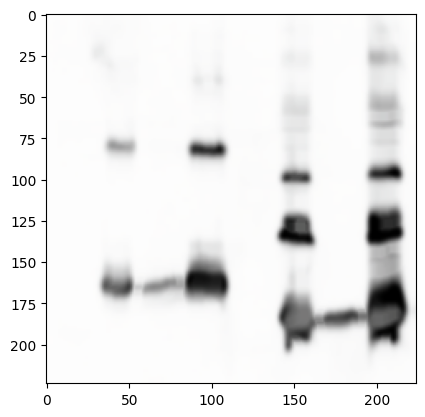

In [27]:
plt.imshow(img_dilated,cmap='gray')
plt.plot()

In [29]:
total_classes = list(set(df_final['Class']))
print(total_classes)

['Blot/Gel', 'Microscopy', 'Macroscopy', 'FACS']


In [30]:
#first fetching the class names from trainLabels.csv

#confirming
print(total_classes)

#classnames to classids
name2num={}
i=0
for name in total_classes:
    name2num[name]=i
    i=i+1
print(name2num)
num2name={}
for i in range(len(total_classes)):
    num2name[i]=total_classes[i]
print(num2name)


['Blot/Gel', 'Microscopy', 'Macroscopy', 'FACS']
{'Blot/Gel': 0, 'Microscopy': 1, 'Macroscopy': 2, 'FACS': 3}
{0: 'Blot/Gel', 1: 'Microscopy', 2: 'Macroscopy', 3: 'FACS'}


In [31]:
df_final['class_id'] = df_final['Class'].apply(lambda x: name2num[x])

In [32]:
final_dataframe = df_final[['image_data','class_id']]

In [34]:
print(final_dataframe.iloc[0])

image_data    [[[2, 2, 2], [2, 2, 2], [2, 2, 2], [0, 0, 0], ...
class_id                                                      0
Name: 0, dtype: object


In [35]:
import torch
import torch.nn as nn
import torchvision.models as models
import torchvision.transforms as transforms
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from PIL import Image
import pandas as pd
import numpy as np

In [39]:
# Load the pre-trained ResNet101 model
resnet101 = models.resnet101(weights=models.ResNet101_Weights.IMAGENET1K_V1)

In [40]:
import torch
if torch.cuda.is_available():
    device=torch.device(type="cuda", index=0)
else:
    device=torch.device(type="cpu", index=0)  

In [41]:
from sklearn.model_selection import train_test_split

train_df, val_df = train_test_split(final_dataframe, test_size=0.3, random_state=42)

In [151]:
class CustomClassifier(nn.Module):
    def __init__(self, num_classes):
        super(CustomClassifier, self).__init__()
        self.fc1 = nn.Linear(1000, 512)
        self.fc2 = nn.Linear(512, num_classes)
        self.dropout = nn.Dropout(0.5)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = x.view(x.size(0),-1)
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

# Load the dataset
class ImageDataset(Dataset):
    def __init__(self, df, transform=None):
        self.df = df
        self.transform = transform

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        img = Image.fromarray(self.df.iloc[idx]['image_data'])
        label = self.df.iloc[idx]['class_id']

        if self.transform:
            img = self.transform(img)

        return img, label
    
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])


In [152]:
dataset = ImageDataset(train_df,transform = transform)
dataloader = DataLoader(dataset, batch_size=4, shuffle=True)

In [ ]:

# # Create a DataLoader
# #dataset = ImageDataset(train_df,transform)
# #dataloader = DataLoader(dataset, batch_size=4, shuffle=True)


# for param in resnet101.parameters():
#     param.requires_grad = False

# model = nn.Sequential(resnet101, CustomClassifier(num_classes=4))
# model.to(device)
# inputs = inputs.to(device)
# # Define the loss function and optimizer
# criterion = nn.CrossEntropyLoss()
# optimizer = optim.Adam(model.parameters(), lr=0.001)

# # Training loop
# num_epochs = 20
# for epoch in range(num_epochs):
#     model.train()
#     running_loss = 0.0
#     total_predictions = 0
#     correct_predictions = 0

#     for i, (inputs, labels) in enumerate(dataloader):
#         inputs = inputs.to(device)  
#         labels = labels.to(device)
#         optimizer.zero_grad()
#         outputs = model(inputs)
#         loss = criterion(outputs, labels)
#         loss.backward()
#         optimizer.step()

#         running_loss += loss.item()

#         _, predicted = torch.max(outputs.data, 1)
#         total_predictions += labels.size(0)
#         correct_predictions += (predicted == labels).sum().item()

#         if i % 100 == 99:
#             print(f'Epoch {epoch+1}, Batch {i+1}, Loss: {running_loss/100:.4f}')
#             running_loss = 0.0

#     train_accuracy = correct_predictions / total_predictions
#     print('______________________________________________________')
#     print(f'Epoch {epoch+1}, Train Accuracy: {train_accuracy:.4f}')
#     print('______________________________________________________')


In [56]:

# Create a DataLoader
dataset = ImageDataset(train_df,transform)
dataloader = DataLoader(dataset, batch_size=4, shuffle=True)


for param in resnet101.parameters():
    param.requires_grad = False

model = nn.Sequential(resnet101, CustomClassifier(num_classes=4))
model.to(device)
inputs = inputs.to(device)
# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 20
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    total_predictions = 0
    correct_predictions = 0

    for i, (inputs, labels) in enumerate(dataloader):
        inputs = inputs.to(device)  
        labels = labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        _, predicted = torch.max(outputs.data, 1)
        total_predictions += labels.size(0)
        correct_predictions += (predicted == labels).sum().item()

        if i % 100 == 99:
            print(f'Epoch {epoch+1}, Batch {i+1}, Loss: {running_loss/100:.4f}')
            running_loss = 0.0

    train_accuracy = correct_predictions / total_predictions
    print('______________________________________________________')
    print(f'Epoch {epoch+1}, Train Accuracy: {train_accuracy:.4f}')
    print('______________________________________________________')


Epoch 1, Batch 100, Loss: 0.7984
Epoch 1, Batch 200, Loss: 0.4663
Epoch 1, Batch 300, Loss: 0.5532
Epoch 1, Batch 400, Loss: 0.4749
Epoch 1, Batch 500, Loss: 0.5521
Epoch 1, Batch 600, Loss: 0.5331
Epoch 1, Batch 700, Loss: 0.4978
Epoch 1, Batch 800, Loss: 0.4032
Epoch 1, Batch 900, Loss: 0.5389
Epoch 1, Batch 1000, Loss: 0.4227
Epoch 1, Batch 1100, Loss: 0.4055
Epoch 1, Batch 1200, Loss: 0.3462
Epoch 1, Batch 1300, Loss: 0.3353
Epoch 1, Batch 1400, Loss: 0.2863
Epoch 1, Batch 1500, Loss: 0.4988
Epoch 1, Batch 1600, Loss: 0.3657
Epoch 1, Batch 1700, Loss: 0.3794
Epoch 1, Batch 1800, Loss: 0.4246
Epoch 1, Batch 1900, Loss: 0.2908
Epoch 1, Batch 2000, Loss: 0.3230
Epoch 1, Batch 2100, Loss: 0.3794
Epoch 1, Batch 2200, Loss: 0.3782
Epoch 1, Batch 2300, Loss: 0.4519
Epoch 1, Batch 2400, Loss: 0.3395
Epoch 1, Batch 2500, Loss: 0.3224
Epoch 1, Batch 2600, Loss: 0.4191
Epoch 1, Batch 2700, Loss: 0.3762
Epoch 1, Batch 2800, Loss: 0.3363
Epoch 1, Batch 2900, Loss: 0.4558
Epoch 1, Batch 3000, Lo

In [161]:
path_to_save_model = '/kaggle/working/model.pth'
torch.save(model.state_dict(), path_to_save_model)

In [59]:
import torch
import torch.nn as nn
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [156]:
def evaluate_model(model, dataloader, criterion):
    model.eval()  # Set the model to evaluation mode
    total_predictions = []
    total_labels = []

    with torch.no_grad():
        for i,(inputs,labels) in enumerate(dataloader):
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            loss = criterion(outputs, labels)

            _, predicted = torch.max(outputs.data, 1)

            total_predictions.extend(predicted.cpu().numpy())
            total_labels.extend(labels.cpu().numpy())

        accuracy = accuracy_score(total_labels, total_predictions)
        precision = precision_score(total_labels, total_predictions, average='macro')
        recall = recall_score(total_labels, total_predictions, average='macro')
        f1 = f1_score(total_labels, total_predictions, average='macro')

    return accuracy, precision, recall, f1

In [157]:
class ImageDataset(Dataset):
    def __init__(self, df, transform=None):
        self.df = df
        self.transform = transform

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        img = Image.fromarray(self.df.iloc[idx]['image_data'])
        label = self.df.iloc[idx]['class_id']

        if self.transform:
            img = self.transform(img)

        return img, label
    
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])


In [160]:
from torch.utils.data import DataLoader

# Assuming `CustomClassifier` is the class for your model
model = CustomClassifier(num_classes=4)  # Change num_classes to match your model
model.to(device)  # Move the model to the device (CPU or GPU) you want to use

# Assuming `val_df` is your validation DataFrame
dataset = ImageDataset(val_df, transform=transform)  # Assuming `transform` is the transformation you defined
dataloader = DataLoader(dataset, batch_size=4, shuffle=False)

# Define your loss function (criterion)
criterion = nn.CrossEntropyLoss()

# Evaluate the model
accuracy, precision, recall, f1 = evaluate_model(model, dataloader, criterion)

print(f'Validation Accuracy: {accuracy:.4f}')
print(f'Validation Precision: {precision:.4f}')
print(f'Validation Recall: {recall:.4f}')
print(f'Validation F1 Score: {f1:.4f}')


RuntimeError: mat1 and mat2 shapes cannot be multiplied (4x150528 and 1000x512)

KeyError: 6210

In [119]:
type(val_df['class_id'])

pandas.core.series.Series

In [120]:
unique_class_ids = set(val_df['class_id'])

# Print the unique class IDs
print(unique_class_ids)

{0, 1, 2, 3}
